In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
data = pd.read_csv("listings.csv")
data.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 75, dtype: object

In [3]:
data

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,187633,https://www.airbnb.com/rooms/187633,20240629155729,2024-06-30,city scrape,Casa vacanze Palazzo Astuto,NaN,Downtown Noto is a little gem of the baroque.,https://a0.muscache.com/pictures/1201046/57032...,902863,...,4.94,4.96,4.83,NaN,t,1,1,0,0,1.08
1,7011,https://www.airbnb.com/rooms/7011,20240629155729,2024-06-30,city scrape,SEASIDE - Historic Antique Residence,WINEYARD WITH COLOURS OF THE SEASIDE.<br /><br...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,16888,...,4.71,4.57,4.57,19081011C235687,t,10,10,0,0,0.18
2,22948,https://www.airbnb.com/rooms/22948,20240629155729,2024-06-30,city scrape,B&B near C station and the historic center. B-...,Near the Central Station and the beginning of ...,"The neighborhood is in a residential area, cen...",https://a0.muscache.com/pictures/hosting/Hosti...,88837,...,4.81,4.89,4.85,19084001C101881,f,2,0,2,0,2.45
3,35264,https://www.airbnb.com/rooms/35264,20240629155729,2024-06-30,city scrape,Etna-sea a panoramic villa,"Our country house, swathed in the greenery of ...","Contact with nature, relaxation, remarkable pa...",https://a0.muscache.com/pictures/31510ca4-8617...,151644,...,4.81,4.86,4.77,NaN,f,5,5,0,0,0.93
4,43992,https://www.airbnb.com/rooms/43992,20240629155729,2024-06-30,city scrape,Flat in front of the beach!!!,Very nice flat in front of the beach with a wo...,NaN,https://a0.muscache.com/pictures/9495798/e9cfb...,192525,...,4.94,4.50,4.64,19081008C203276,f,2,2,0,0,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59882,1188459653784944030,https://www.airbnb.com/rooms/1188459653784944030,20240629155729,2024-06-30,city scrape,Bellini Room (Casa Fagone),Casa Fagone is characterized by a modern decor...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,586101233,...,NaN,NaN,NaN,NaN,t,3,0,3,0,NaN
59883,1188461382923788043,https://www.airbnb.com/rooms/1188461382923788043,20240629155729,2024-06-29,city scrape,Deliziosa roulotte stanziale,The beautiful setting of this romantic place s...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,200658493,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
59884,1188485626776288978,https://www.airbnb.com/rooms/1188485626776288978,20240629155729,2024-06-30,city scrape,[Stagnone Marsala][2-4 PAX][Family][Kiter][Sur...,Do you want to relax while admiring one of the...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,472857559,...,NaN,NaN,NaN,NaN,t,3,3,0,0,NaN
59885,1188502068378113990,https://www.airbnb.com/rooms/1188502068378113990,20240629155729,2024-06-30,city scrape,Casa arancio del mare,"live an experience in the heart of Sicily, clo...",NaN,https://a0.muscache.com/pictures/hosting/Hosti...,113490955,...,NaN,NaN,NaN,NaN,f,3,3,0,0,NaN


In [4]:
data_filtered = data[["name","description", "neighbourhood_cleansed", "room_type", "accommodates", "price", "number_of_reviews", "first_review", "last_review",  "review_scores_rating", "reviews_per_month"]]

data_filtered

,name,description,neighbourhood_cleansed,room_type,accommodates,price,number_of_reviews,first_review,last_review,review_scores_rating,reviews_per_month
0,Casa vacanze Palazzo Astuto,NaN,Noto,Entire home/apt,3,$90.00,140,2013-10-28,2024-06-22,4.81,1.08
1,SEASIDE - Historic Antique Residence,WINEYARD WITH COLOURS OF THE SEASIDE.<br /><br...,Marsala,Entire home/apt,6,$227.00,32,2009-08-26,2023-07-22,4.68,0.18
2,B&B near C station and the historic center. B-...,Near the Central Station and the beginning of ...,Agrigento,Private room,2,$52.00,383,2011-08-30,2024-06-17,4.80,2.45
3,Etna-sea a panoramic villa,"Our country house, swathed in the greenery of ...",Piedimonte Etneo,Entire home/apt,14,$85.00,157,2010-07-26,2024-04-27,4.79,0.93
4,Flat in front of the beach!!!,Very nice flat in front of the beach with a wo...,Erice,Entire home/apt,5,$112.00,65,2013-04-22,2024-06-05,4.66,0.48
...,...,...,...,...,...,...,...,...,...,...,...
59882,Bellini Room (Casa Fagone),Casa Fagone is characterized by a modern decor...,Catania,Private room,2,$64.00,0,NaN,NaN,NaN,NaN
59883,Deliziosa roulotte stanziale,The beautiful setting of this romantic place s...,Comiso,Entire home/apt,2,$40.00,0,NaN,NaN,NaN,NaN
59884,[Stagnone Marsala][2-4 PAX][Family][Kiter][Sur...,Do you want to relax while admiring one of the...,Marsala,Entire home/apt,4,$109.00,0,NaN,NaN,NaN,NaN
59885,Casa arancio del mare,"live an experience in the heart of Sicily, clo...",Santa Croce Camerina,Entire home/apt,4,$95.00,0,NaN,NaN,NaN,NaN


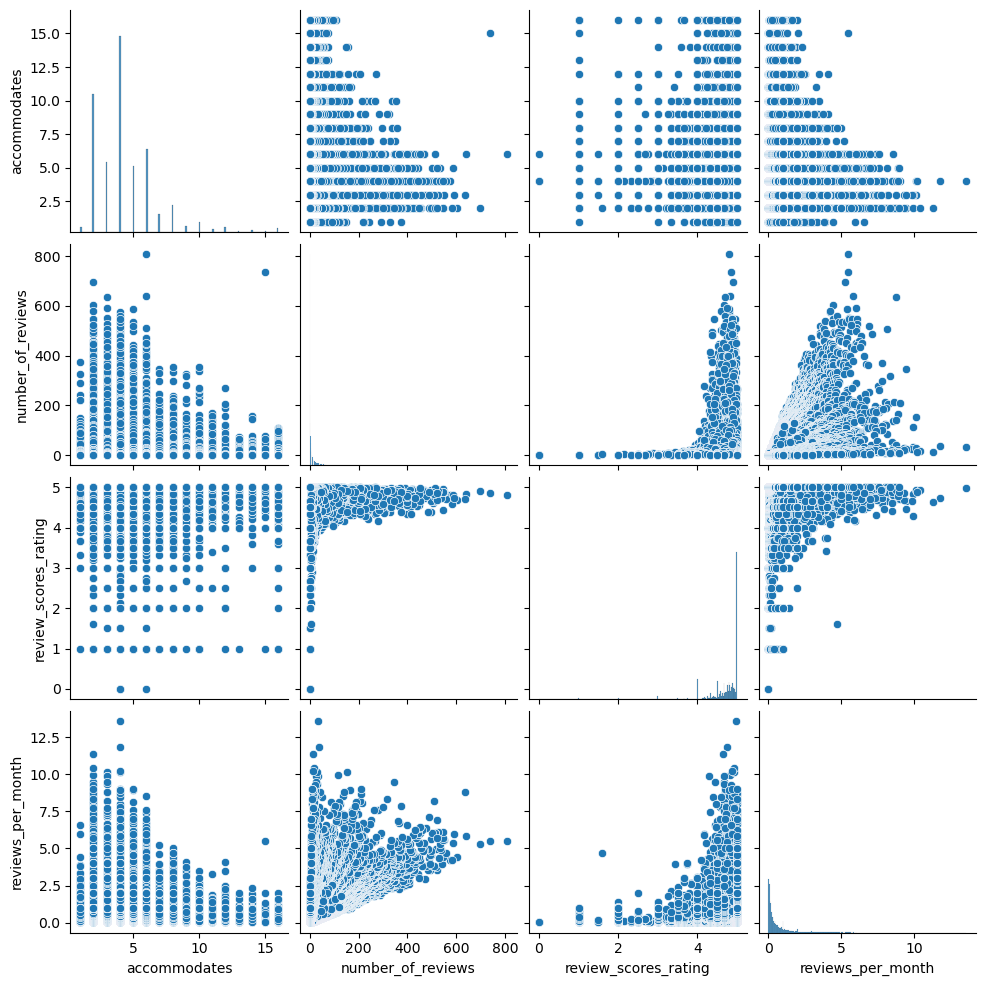

In [5]:
# palette personalizzata 

colors = ['#8447ff', '#fdb833','#ec0868', '#00DFC0'] 

# Crea un pairplot con la palette esadecimale
sns.pairplot(data_filtered)
plt.savefig('pair_plot.png', bbox_inches='tight', dpi=300)

<Axes: >

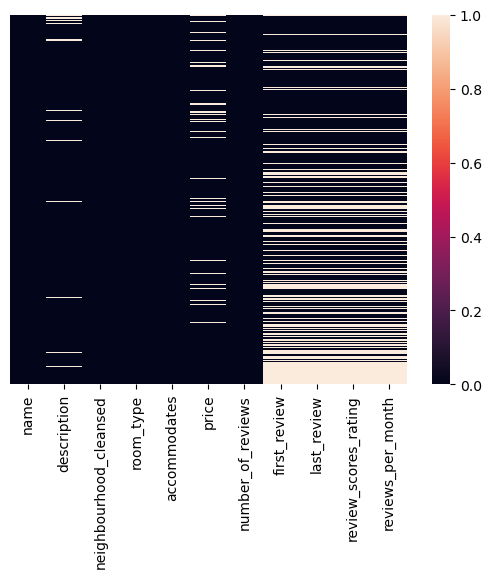

In [6]:
sns.heatmap(data_filtered.isnull(),yticklabels = False) 

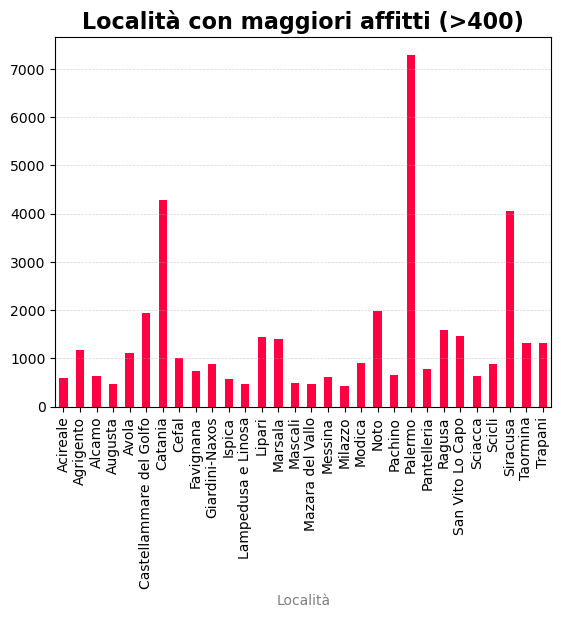

In [7]:
city_groups = data_filtered.groupby(by="neighbourhood_cleansed")

# for key, item in city_groups:
#     temp = city_groups.get_group(key)

#print(city_groups.get_group(key).transpose(), "\n\n------------------\n\n")
# print(key + "\n" + str(temp.shape[0]) + "\n")


# ---------------------- occorrenze di affitti x locazione

frequenze = data_filtered['neighbourhood_cleansed'].value_counts().sort_index()

# frequenze.head(10)

# frequenze_filtered = frequenze[frequenze.values > 20]
# frequenze 379 elementi
# frequenze_filtered 195 elementi

frequenze_filtered = frequenze[frequenze.values > 400]
frequenze_filtered.plot(kind='bar',color='#ff0042')
plt.title('Località con maggiori affitti (>400)', fontsize=16,color='black',  fontweight='bold')
plt.grid(axis='y',linestyle='--', linewidth=0.5, alpha=0.5)
_ = plt.xlabel('Località', color='grey')
plt.savefig('localit_maggior_affitti.png', bbox_inches='tight', dpi=300)

In [8]:
reviews_location = data_filtered.groupby('neighbourhood_cleansed').sum('number_of_reviews')
reviews_location_numbers = reviews_location[['number_of_reviews']]
reviews_location_numbers

,number_of_reviews
neighbourhood_cleansed,
Acate,71
Aci Bonaccorsi,131
Aci Castello,7061
Aci Catena,1931
Aci Sant'Antonio,617
...,...
Villarosa,13
Vita,58
Vittoria,743


In [9]:
palermo_bnb = city_groups.get_group('Palermo')
# drop_duplicates()
# grouped_accomodates = palermo_bnb.groupby('accommodates')

palermo_bnb.sort_values(by='accommodates', ascending=False).head(10)
    

,name,description,neighbourhood_cleansed,room_type,accommodates,price,number_of_reviews,first_review,last_review,review_scores_rating,reviews_per_month
6773,Great Accommodation-Group of 10-22,Perfect accommodation for groups who want to r...,Palermo,Entire home/apt,16,$660.00,31,2016-05-23,2024-06-06,4.71,0.31
50998,Palazzo Falcone Apartments,The Palazzo Falcone is located a stone's throw...,Palermo,Entire home/apt,16,$134.00,0,NaN,NaN,NaN,NaN
10582,L’Hôtellerie ‘700 sea view house and terrace,"In the heart of the historical center, inside ...",Palermo,Entire home/apt,16,"$2,500.00",3,2017-06-04,2019-07-18,5.00,0.03
32878,LuminHouse Suites Piscina Pool Mondello,"Surrounded by a harmonious LuminHouse garden, ...",Palermo,Private room,16,$250.00,2,2022-09-08,2023-08-16,5.00,0.09
12750,Kala Rooms,"We are in Piazza Marina, in the heart of Paler...",Palermo,Private room,16,$65.00,14,2019-05-06,2023-10-22,4.71,0.22
38440,Villa incredibile con piscina per gruppi,"A villa characterized by 2000m2 of garden, an...",Palermo,Private room,16,"$1,300.00",0,NaN,NaN,NaN,NaN
24241,Mabbonath bed and breakfast Palermo Centro,One room in bed and breakfast. City center.<br...,Palermo,Private room,16,$61.00,3,2021-07-30,2022-07-10,4.33,0.08
12810,Come in campagna.,The Baglio is an old country house that has be...,Palermo,Entire home/apt,16,$130.00,0,NaN,NaN,NaN,NaN
24203,Palazzo Conte Federico Apartments,Seven elegant and charming apartments in one o...,Palermo,Entire home/apt,16,$850.00,13,2021-09-26,2024-05-16,4.92,0.39
31848,historic apartment with hotel treatment,Wonderful 17th century noble apartment in the ...,Palermo,Entire home/apt,16,$680.00,2,2024-06-09,2024-06-23,4.00,2.00


In [10]:
palermo_bnb.sort_values(by='accommodates', ascending=False).tail(10)

,name,description,neighbourhood_cleansed,room_type,accommodates,price,number_of_reviews,first_review,last_review,review_scores_rating,reviews_per_month
6833,R. H. G. Singola 201,The rooms are well soundproofed with private t...,Palermo,Private room,1,NaN,0,NaN,NaN,NaN,NaN
55006,La Suite di Luna,Luna's suite is located on the terrace of an A...,Palermo,Entire home/apt,1,$68.00,0,NaN,NaN,NaN,NaN
18073,"Cozy & Terrace, Historic center","Bright penthouse in the center of Palermo, ide...",Palermo,Private room,1,$24.00,291,2019-02-08,2024-06-22,4.88,4.43
57276,D'Altro Canto Home 6C,D'Atro Canto Home is the ideal home for those ...,Palermo,Private room,1,$40.00,2,2024-05-28,2024-06-12,4.50,1.76
56575,Narbone 42 camera singola con bagno privato,Narbone 42 is ideally located in the center of...,Palermo,Private room,1,$52.00,0,NaN,NaN,NaN,NaN
37560,Smile House Mondello - A - CIR19082053C211806,"Entire apartment, 1 guest. House not suitable...",Palermo,Entire home/apt,1,$70.00,1,2023-04-25,2023-04-25,5.00,0.07
46150,Camera singola con terrazza,"Thanks to this strategically located space, yo...",Palermo,Private room,1,$30.00,1,2023-07-12,2023-07-12,5.00,0.08
43893,Stanza giungla in Villa,"A room immersed in the forest, with the differ...",Palermo,Private room,1,$35.00,10,2023-05-29,2024-03-18,4.80,0.75
1089,"COZY, CHEAP AND CENTRAL!","SINGLE ROOM (QUEENSIZE BED) in large, bright, ...",Palermo,Private room,1,$18.00,93,2013-09-05,2020-03-10,4.76,0.71
38676,Mirto Home - Deep Purple,This elegant space is 2 steps away from unmiss...,Palermo,Private room,1,$45.00,26,2023-04-04,2024-05-27,4.81,1.72


In [11]:
palermo_bnb.sort_values(by='number_of_reviews', ascending=False).head(20)

,name,description,neighbourhood_cleansed,room_type,accommodates,price,number_of_reviews,first_review,last_review,review_scores_rating,reviews_per_month
808,Apartment in the center of Palermo,"Located in the city centre. Monuments, theater...",Palermo,Private room,15,$45.00,738,2013-06-02,2024-06-26,4.85,5.47
5004,Bed à Vucciria,The house is located in a completely renovated...,Palermo,Entire home/apt,5,$84.00,586,2015-07-22,2024-06-15,4.81,5.38
594,3sisters apartments - porta felice,Apartment in the heart of the historic center ...,Palermo,Entire home/apt,4,$78.00,576,2013-04-29,2024-06-23,4.80,4.23
7392,Le Cupole Design “GreenRoom”,NaN,Palermo,Private room,2,$71.00,548,2016-05-28,2024-06-25,4.96,5.56
647,Grande stanza al centro di Palermo,I love my apartment because I have personally ...,Palermo,Private room,4,$48.00,541,2013-03-05,2024-06-27,4.73,3.92
6548,CasaLoft alla cattedrale,"Renovated apartment, located a few steps from ...",Palermo,Entire home/apt,4,$45.00,534,2016-04-05,2024-06-22,4.87,5.32
1806,Palermo Cathedral Loft Aprtment _WiFi_,"Hi, this is Marcello, I lived this building fo...",Palermo,Entire home/apt,4,$47.00,531,2014-07-07,2024-06-16,4.93,4.37
39891,Wonderful Italy | Casetta Borsa,Lovely apartment a few steps away from the mai...,Palermo,Entire home/apt,2,$48.00,522,2016-12-11,2024-06-18,4.86,5.68
194,"Grande stanza vicino al mare, pieno centro",I love my apartment because I have personally ...,Palermo,Private room,4,$44.00,520,2012-07-27,2024-06-27,4.73,3.58
864,Casa Rò the historic center Palermo,A whole apartment all to yourself in the heart...,Palermo,Entire home/apt,4,NaN,503,2013-09-24,2024-06-22,4.61,3.84


In [12]:
palermo_bnb.sort_values(by='name', ascending=False).head(20)

,name,description,neighbourhood_cleansed,room_type,accommodates,price,number_of_reviews,first_review,last_review,review_scores_rating,reviews_per_month
28084,𝓒𝓪𝓼𝓪 𝓜𝓪𝓷𝓭𝓸𝓻𝓵𝓸 a Mondello,"Itis a10-minutewalktoMondello, 2 minutes by bi...",Palermo,Entire home/apt,7,$140.00,17,2021-08-24,2024-06-08,4.88,0.49
9253,✅Uloft palermo- free access by car,A modern and elegant loft on the third floor w...,Palermo,Entire home/apt,4,$88.00,126,2017-05-02,2024-06-10,4.80,1.44
32642,✅New! Mondello Family Villa 🏖| close to the b...,"In the beautiful seaside resort of Mondello, C...",Palermo,Entire home/apt,9,$225.00,18,2022-05-29,2024-06-15,4.78,0.71
25084,✅NEW! Casa Rammacca|Exclusive choice city lounge,"Stylish apartment locate at Rammacca Palace, i...",Palermo,Entire home/apt,3,$89.00,94,2020-08-07,2024-05-27,4.74,1.98
25076,✅ NEW! PALERMO LUXURY| the best in the center,PALERMO LUXURY is located in the city lounge <...,Palermo,Entire home/apt,4,$110.00,68,2020-08-08,2024-06-22,4.85,1.43
2971,★Zyz★ - Walk everywhere - Wifi & air con,Zyz is located on the mezzanine floor of a bea...,Palermo,Entire home/apt,5,$67.00,303,2014-11-08,2024-06-10,4.79,2.58
9419,★U Ranni★ - Walk everywhere - Wi-fi and A/C,This holiday apartment is located on the mezza...,Palermo,Entire home/apt,5,$74.00,130,2017-04-07,2024-05-27,4.83,1.48
9417,★U Nicu★ Romantic gateaway - Private Patio - Wifi,This holiday apartment is located on the mezza...,Palermo,Entire home/apt,3,$67.00,86,2017-04-18,2024-05-29,4.87,0.98
42088,•Luminos Vucciria• Centro Storico,The apartment takes its name from the historic...,Palermo,Entire home/apt,2,$84.00,92,2023-04-16,2024-06-24,4.54,6.24
58545,“Wow” panoramic penthouse,You will be struck by the large outdoor spaces...,Palermo,Entire home/apt,4,$199.00,0,NaN,NaN,NaN,NaN


In [13]:
palermo_bnb.sort_values(by='number_of_reviews', ascending=False).tail(30)

,name,description,neighbourhood_cleansed,room_type,accommodates,price,number_of_reviews,first_review,last_review,review_scores_rating,reviews_per_month
49661,Suite,"Kick back and relax inthis calm, stylish space...",Palermo,Entire home/apt,2,$103.00,0,NaN,NaN,NaN,NaN
20951,Home SHS,Two adjacent apartments are located 30 minutes...,Palermo,Entire home/apt,4,$86.00,0,NaN,NaN,NaN,NaN
20218,PALERMO CENTRO :CAMERA MATRIMONIALE+LETTO SINGOLO,The Palace is located a stone's throw from the...,Palermo,Private room,3,$52.00,0,NaN,NaN,NaN,NaN
49639,Double Room With Private Bathroom,Double Room With Private Bathroom is a private...,Palermo,Private room,3,$36.00,0,NaN,NaN,NaN,NaN
49634,"Apartment with bath , kitchen and private balcony","The apartment with bath, kitchen, and private ...",Palermo,Private room,3,$36.00,0,NaN,NaN,NaN,NaN
20408,Tripla Bradamante,The Bradamante room is a triple room with all ...,Palermo,Private room,3,$120.00,0,NaN,NaN,NaN,NaN
20524,Genio di Piazza Rivoluzione,"In the historic center of Palermo, close to th...",Palermo,Entire home/apt,2,$75.00,0,NaN,NaN,NaN,NaN
20577,Villa Rosato,newly built house furnished with modern and mi...,Palermo,Entire home/apt,4,$140.00,0,NaN,NaN,NaN,NaN
49589,Elegant Double Room With Private Balcony,Elegant Double Room With Private Balcony is a ...,Palermo,Private room,2,$30.00,0,NaN,NaN,NaN,NaN
49587,Quiet and Peaceful Double Room,Quiet and Peaceful Double Room is a large brig...,Palermo,Private room,2,NaN,0,NaN,NaN,NaN,NaN


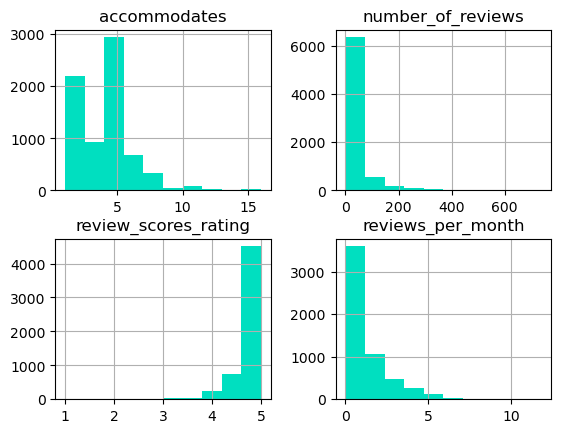

In [14]:
palermo_bnb.hist(color='#00DFC0')
plt.savefig('hist.png', bbox_inches='tight', dpi=300)

In [15]:
accomodated_x_review = palermo_bnb.groupby('accommodates').sum('number_of_reviews')
accomodated_x_review = accomodated_x_review[['number_of_reviews']]
accomodated_x_review.sort_values(by='number_of_reviews', ascending=False)

,number_of_reviews
accommodates,
4,76423
2,64834
3,31333
5,21079
6,19657
7,5605
8,5543
1,2687
9,2062


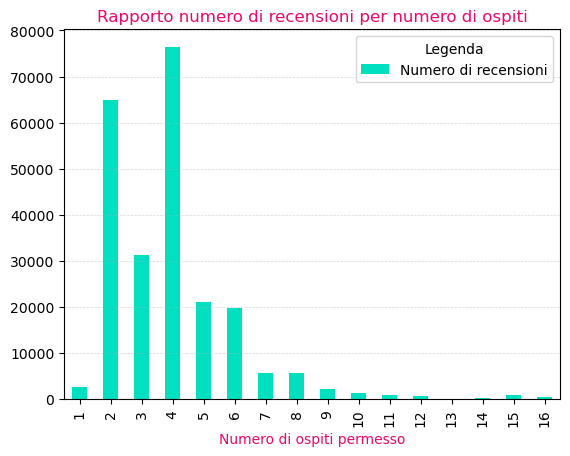

In [16]:
accomodated_x_review.plot(kind='bar',color='#00DFC0')
plt.title('Rapporto numero di recensioni per numero di ospiti', fontsize=12,color='#ec0868')
plt.grid(axis='y',linestyle='--', linewidth=0.5, alpha=0.5)
_ = plt.xlabel('Numero di ospiti permesso', color='#ec0868')

plt.legend(['Numero di recensioni'], title="Legenda", loc="upper right", fontsize=10)

Text(0, 0.5, 'Numero di Recensioni')

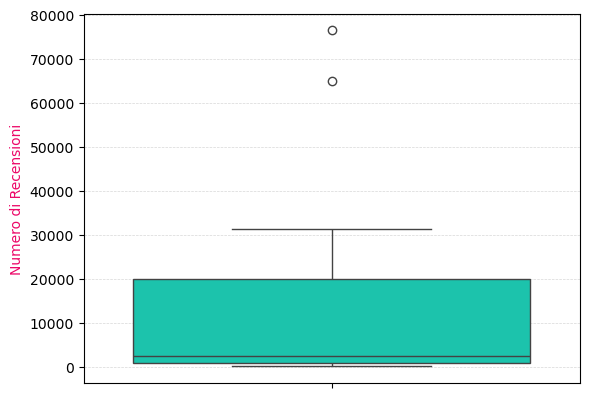

In [17]:
sns.boxplot(data=accomodated_x_review['number_of_reviews'], color='#00DFC0')
plt.grid(axis='y',linestyle='--', linewidth=0.5, alpha=0.5)
plt.ylabel('Numero di Recensioni',color='#ec0868')

In [18]:
accomodated_x_review

# plt.figure(figsize=(10, 6))
# sns.heatmap(accomodated_x_review, annot=True, fmt='d', cmap='Oranges')
# plt.title('Rapporto numero di recensioni per numero di ospiti',color='red')
# plt.xlabel('Ospiti Permessi',color='red')
# plt.ylabel('Recensioni',color='red')
# plt.show()


,number_of_reviews
accommodates,
1,2687
2,64834
3,31333
4,76423
5,21079
6,19657
7,5605
8,5543
9,2062


In [19]:
n_types_x_review = palermo_bnb.groupby('room_type').sum('number_of_reviews')
n_types_x_review_filtered = n_types_x_review[['number_of_reviews']]
n_types_x_review_filtered.sort_values(by='number_of_reviews', ascending=False)

,number_of_reviews
room_type,
Entire home/apt,199693
Private room,32570
Hotel room,1063
Shared room,215


In [20]:
# n_accomodates_x_review_filtered 

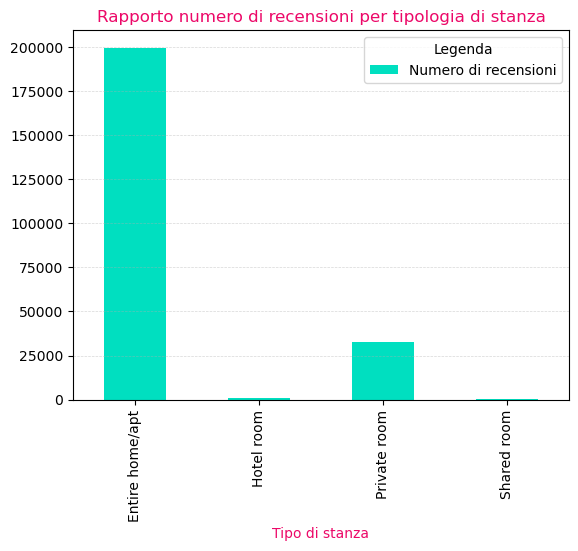

In [21]:
n_types_x_review_filtered.plot(kind='bar',color=['#00DFC0'])
plt.title('Rapporto numero di recensioni per tipologia di stanza', fontsize=12,color='#ec0868')
plt.grid(axis='y',linestyle='--', linewidth=0.5, alpha=0.5)
_ = plt.xlabel('Tipo di stanza', color='#ec0868')

plt.legend(['Numero di recensioni'], title="Legenda", loc="upper right", fontsize=10)

In [22]:
accomodates_x_room_type = palermo_bnb.groupby(['accommodates','room_type']).size().unstack(fill_value=0)
# accomodates_x_room_type.plot(kind='bar', figsize=(10, 6))

# numero di tipologie di stanze x numero di ospiti ammessi

accomodates_x_room_type

room_type,Entire home/apt,Hotel room,Private room,Shared room
accommodates,,,,
1,11,1,86,18
2,1022,24,1041,1
3,638,9,289,0
4,2155,14,188,1
5,560,1,23,0
6,658,0,20,1
7,147,0,4,2
8,171,0,11,4
9,40,0,1,0


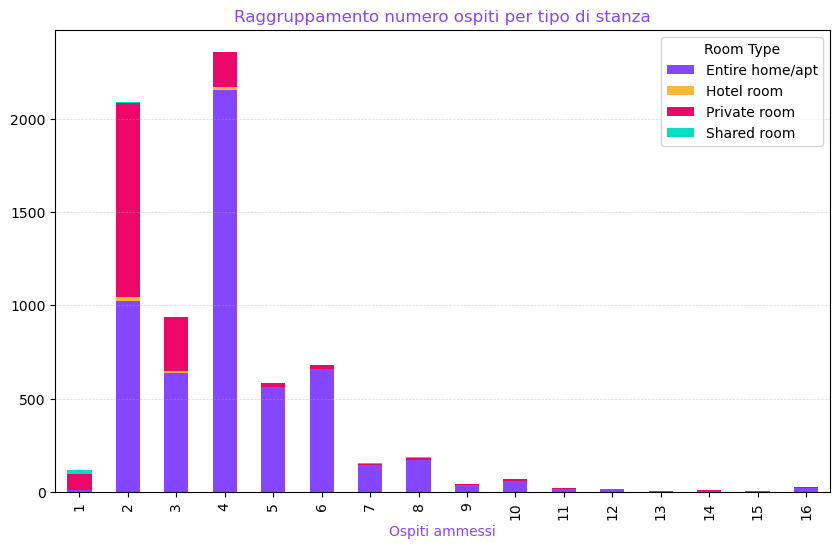

In [23]:
colors = ['#8447ff', '#fdb833','#ec0868', '#00DFC0'] 

accomodates_x_room_type.plot(kind='bar',stacked=True, color=colors, figsize=(10, 6))
plt.title('Raggruppamento numero ospiti per tipo di stanza', fontsize=12,color='#8447ff')
plt.grid(axis='y',linestyle='--', linewidth=0.5, alpha=0.5)
_ = plt.xlabel('Ospiti ammessi', color='#8447ff')

plt.legend(title="Room Type", loc="upper right", fontsize=10)

In [24]:
accomodates_x_room_type

room_type,Entire home/apt,Hotel room,Private room,Shared room
accommodates,,,,
1,11,1,86,18
2,1022,24,1041,1
3,638,9,289,0
4,2155,14,188,1
5,560,1,23,0
6,658,0,20,1
7,147,0,4,2
8,171,0,11,4
9,40,0,1,0


In [25]:
accomodates_x_reviews_grouped = palermo_bnb.groupby(['accommodates','number_of_reviews']).size().unstack(fill_value=0)
accomodates_x_reviews_grouped
max_reviews_per_accommodate = palermo_bnb.groupby('accommodates')['number_of_reviews'].max()
max_reviews_per_accommodate

accommodates
1     376
2     548
3     498
4     576
5     586
6     414
7     348
8     356
9     325
10    266
11    168
12    207
13     37
14     42
15    738
16    106
Name: number_of_reviews, dtype: int64

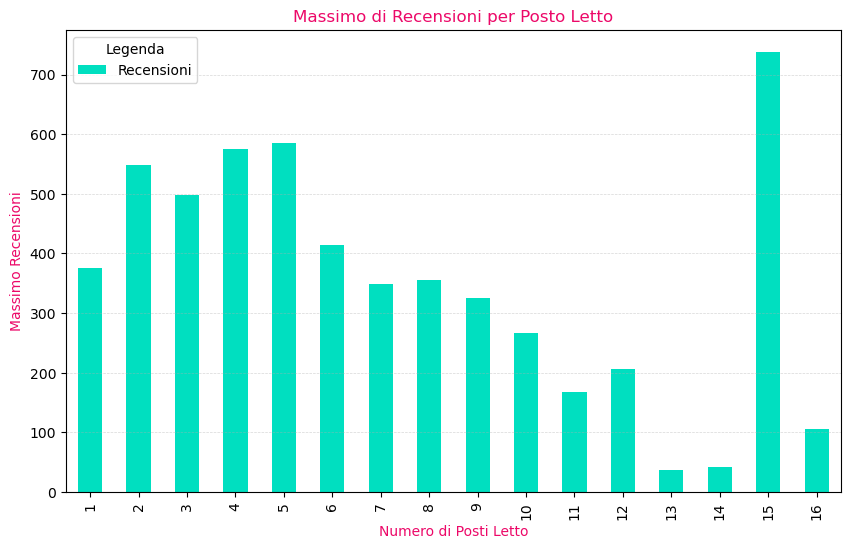

In [26]:
max_reviews_x_accomodates_df = pd.DataFrame({
    'Accomodates': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
    'Max_reviews': [376, 548, 498, 576, 586, 414, 348, 356, 325, 266, 168, 207, 37, 42, 738, 106]
})

max_reviews_x_accomodates_df.plot(x='Accomodates', y='Max_reviews', kind='bar', color='#00DFC0', figsize=(10, 6))
plt.grid(axis='y',linestyle='--', linewidth=0.5, alpha=0.5)
plt.title('Massimo di Recensioni per Posto Letto',color='#ec0868')
plt.xlabel('Numero di Posti Letto',color='#ec0868')
_ = plt.ylabel('Massimo Recensioni',color='#ec0868')



plt.legend(['Recensioni'], title="Legenda", loc="upper left", fontsize=10)

In [27]:
df = pd.DataFrame(palermo_bnb)

def ricodifica_price(price):
    if isinstance(price, str) and price.startswith('$'):
        numeric_part = price[1:]  
        # Verifica se la parte numerica è valida
        if numeric_part.replace('.', '').isnumeric():  
            return float(numeric_part)  
        else:
            return None   

In [28]:
df['prezzi_ricodificati'] = df['price'].apply(ricodifica_price)

In [29]:
df.groupby('accommodates')['prezzi_ricodificati'].sum()

accommodates
1       4876.0
2     154061.0
3      68742.0
4     224744.0
5      63150.0
6      92987.0
7      21461.0
8      32003.0
9       7810.0
10     17617.0
11      5441.0
12      4901.0
13      1377.0
14      2342.0
15      2178.0
16      8565.0
Name: prezzi_ricodificati, dtype: float64

In [30]:
mean_price = df.groupby('accommodates')['prezzi_ricodificati'].mean()
mean_price

accommodates
1      46.438095
2      79.783014
3      79.470520
4     100.108686
5     112.366548
6     143.277350
7     152.205674
8     189.366864
9     200.256410
10    303.741379
11    320.058824
12    326.733333
13    344.250000
14    334.571429
15    363.000000
16    389.318182
Name: prezzi_ricodificati, dtype: float64

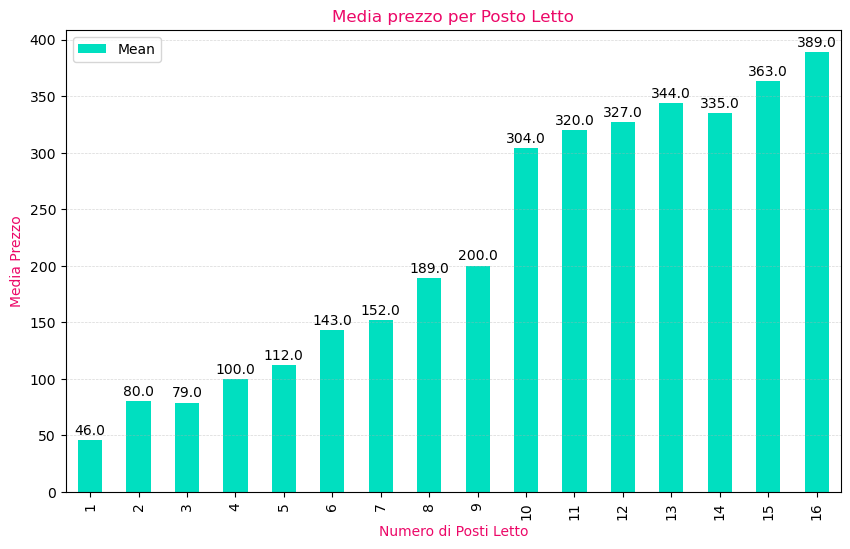

In [31]:
mean_price_df = pd.DataFrame({
    'Accomodates': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
    'Mean': [ 46.0, 80.0, 79.0, 100.0, 112.0, 143.0, 152.0, 189.0, 200.0, 304.0, 320.0, 327.0, 344.0,335.0, 363.0, 389.0]
})

mean_price_df.plot(x='Accomodates', y='Mean', kind='bar', color='#00DFC0', figsize=(10, 6))
plt.grid(axis='y',linestyle='--', linewidth=0.5, alpha=0.5)
plt.title('Media prezzo per Posto Letto',color='#ec0868')
plt.xlabel('Numero di Posti Letto',color='#ec0868')
_ = plt.ylabel('Media Prezzo',color='#ec0868')

# Aggiungiamo le etichette sopra le barre
for i, v in enumerate(mean_price_df['Mean']):
    plt.text(i, v + 5, f"{v}", ha='center')

In [32]:
# review_price_df = pd.DataFrame({
#     'number_of_reviews': [2687, 64834, 31333, 76423, 21079, 19657, 5605, 5543, 2062, 1329, 842, 669, 90, 109, 887, 392],
#     'Mean': [ 46.0, 80.0, 79.0, 100.0, 112.0, 143.0, 152.0, 189.0, 200.0, 304.0, 320.0, 327.0, 344.0,335.0, 363.0, 389.0]
# })

# review_price_df.plot(x='Mean', y='number_of_reviews', kind='bar', color='#00DFC0', figsize=(10, 6))
# plt.grid(axis='y',linestyle='--', linewidth=0.5, alpha=0.5)
# plt.title('Rapporto Numero Recensioni e Prezzo',color='#ec0868')
# plt.xlabel('Media Prezzi',color='#ec0868')
# _ = plt.ylabel('Numero Recensioni',color='#ec0868')

# # Aggiungiamo le etichette sopra le barre
# # for i, v in enumerate(review_price_df['Mean']):
# #     plt.text(i, v + 5, f"{v}", ha='center')

In [33]:
# sns.boxplot(data=review_price_df['Mean'], color='#00DFC0')
# plt.grid(axis='y',linestyle='--', linewidth=0.5, alpha=0.5)
# plt.ylabel('Media Prezzo',color='#ec0868')


In [34]:
accomodated_x_review

,number_of_reviews
accommodates,
1,2687
2,64834
3,31333
4,76423
5,21079
6,19657
7,5605
8,5543
9,2062


In [35]:
# percentili Palermo, recensioni x posti letto

accomodates = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
reviews = [2687,64834,31333,76423,21079,19657,5605,5543,2062,1329,842,669,90,109,887,392]
somma_rec = 0
temp = 0
reviews_fractioned = []

for i in range(len(reviews)):
    somma_rec = somma_rec + reviews[i]
    # print(somma_rec)

print(f"la somma delle recensioni è {somma_rec}")

for i in range(len(reviews)):
    temp = reviews[i] / somma_rec
    # print(temp)
    reviews_fractioned.append(temp)

print(f"I percentili sono: {reviews_fractioned}")

temp = 0
reviews_per_cent = []
for i in range(len(reviews_fractioned)):
    temp = reviews_fractioned[i] * 100 
    reviews_per_cent.append(temp)


print(f"l'array di percentuali è: \n{reviews_per_cent}")



la somma delle recensioni è 233541
I percentili sono: [0.011505474413486283, 0.2776129244971975, 0.13416487897200063, 0.3272359029035587, 0.09025824159355317, 0.08416937497056191, 0.02400006851045427, 0.023734590500169135, 0.008829284793676485, 0.005690649607563554, 0.0036053626558077596, 0.002864593369044408, 0.0003853713052526109, 0.00046672746969482877, 0.0037980483084340652, 0.0016785061295447052]
l'array di percentuali è: 
[1.1505474413486283, 27.76129244971975, 13.416487897200064, 32.72359029035587, 9.025824159355317, 8.41693749705619, 2.400006851045427, 2.3734590500169137, 0.8829284793676485, 0.5690649607563554, 0.36053626558077595, 0.28645933690444075, 0.038537130525261094, 0.04667274696948288, 0.37980483084340655, 0.1678506129544705]


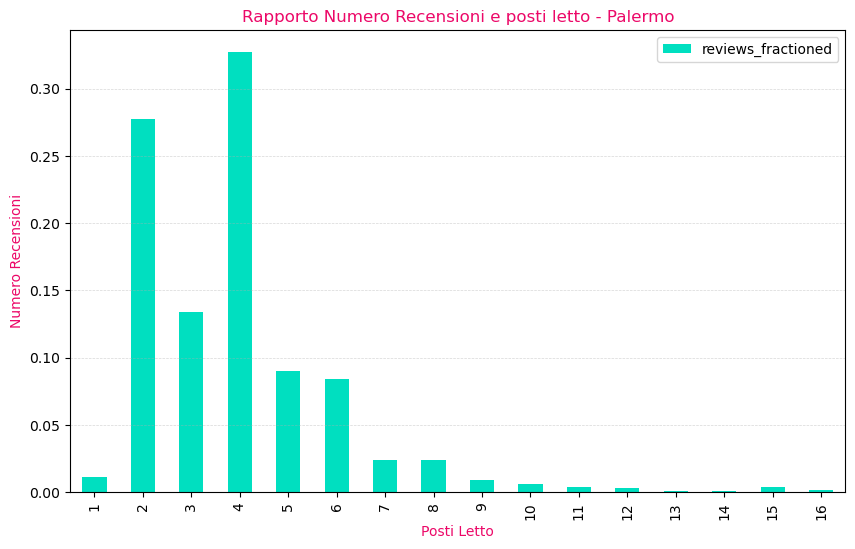

In [36]:
accomodates = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
standard_review_x_accomodation = pd.DataFrame({
    'accomodates': accomodates,
    'reviews_fractioned': reviews_fractioned
})

standard_review_x_accomodation

standard_review_x_accomodation.plot(x='accomodates', y='reviews_fractioned', kind='bar', color='#00DFC0', figsize=(10, 6))
plt.grid(axis='y',linestyle='--', linewidth=0.5, alpha=0.5)
plt.title('Rapporto Numero Recensioni e posti letto - Palermo',color='#ec0868')
plt.xlabel('Posti Letto',color='#ec0868')
_ = plt.ylabel('Numero Recensioni',color='#ec0868')

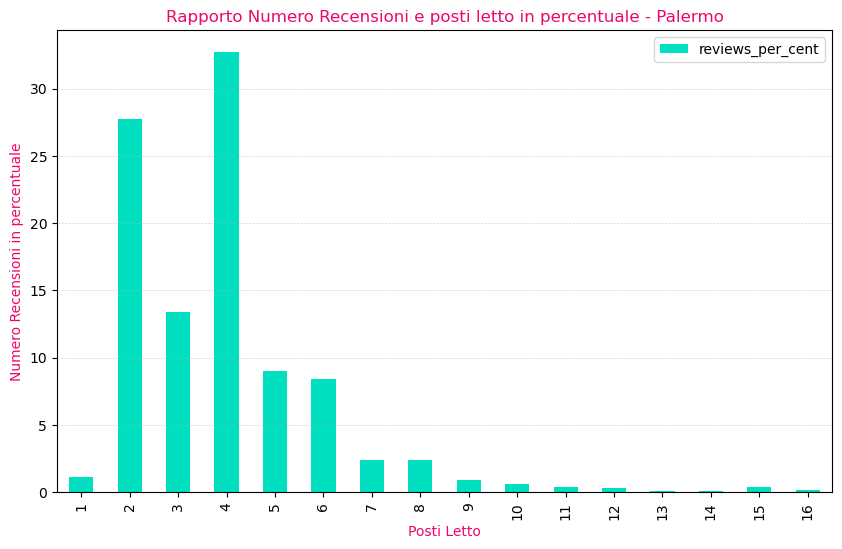

In [37]:
accomodates = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]

standard_review_x_accomodation = pd.DataFrame({
    'accomodates': accomodates,
    'reviews_per_cent': reviews_per_cent
})

# standard_review_x_accomodation

standard_review_x_accomodation.plot(x='accomodates', y='reviews_per_cent', kind='bar', color='#00DFC0', figsize=(10, 6))
plt.grid(axis='y',linestyle='--', linewidth=0.5, alpha=0.5)
plt.title('Rapporto Numero Recensioni e posti letto in percentuale - Palermo',color='#ec0868')
plt.xlabel('Posti Letto',color='#ec0868')
_ = plt.ylabel('Numero Recensioni in percentuale',color='#ec0868')

In [38]:
# percentili Catania, recensioni x posti letto

accomodates = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
reviews_catania = [1420,45981,18321,44035,8828,11760,2779,3370,370,939,68,471,31,56,37,143]
somma_rec = 0
temp = 0
reviews_fractioned_catania = []

for i in range(len(reviews_catania)):
    somma_rec = somma_rec + reviews_catania[i]
    # print(somma_rec)

print(f"la somma delle recensioni è {somma_rec}")

for i in range(len(reviews_catania)):
    temp = reviews_catania[i] / somma_rec
    # print(temp)
    reviews_fractioned_catania.append(temp)

print(f"I percentili sono: {reviews_fractioned_catania}")

temp = 0
reviews_per_cent_catania = []
for i in range(len(reviews_fractioned_catania)):
    temp = reviews_fractioned_catania[i] * 100 
    reviews_per_cent_catania.append(temp)


print(f"l'array di percentuali è: \n{reviews_per_cent_catania}")
print(reviews_fractioned_catania)

la somma delle recensioni è 138609
I percentili sono: [0.010244645008621375, 0.33173170573339394, 0.13217756422743113, 0.3176922133483396, 0.06368994798317569, 0.0848429755643573, 0.020049203154196338, 0.024312995548629597, 0.0026693793332323297, 0.006774451875419345, 0.0004905886342156714, 0.0033980477458173714, 0.00022365070089243845, 0.00040401416935408236, 0.00026693793332323296, 0.0010316790396006032]
l'array di percentuali è: 
[1.0244645008621374, 33.17317057333939, 13.217756422743113, 31.769221334833958, 6.368994798317569, 8.48429755643573, 2.004920315419634, 2.4312995548629597, 0.26693793332323296, 0.6774451875419345, 0.049058863421567143, 0.33980477458173713, 0.022365070089243846, 0.04040141693540824, 0.026693793332323294, 0.10316790396006031]
[0.010244645008621375, 0.33173170573339394, 0.13217756422743113, 0.3176922133483396, 0.06368994798317569, 0.0848429755643573, 0.020049203154196338, 0.024312995548629597, 0.0026693793332323297, 0.006774451875419345, 0.0004905886342156714,

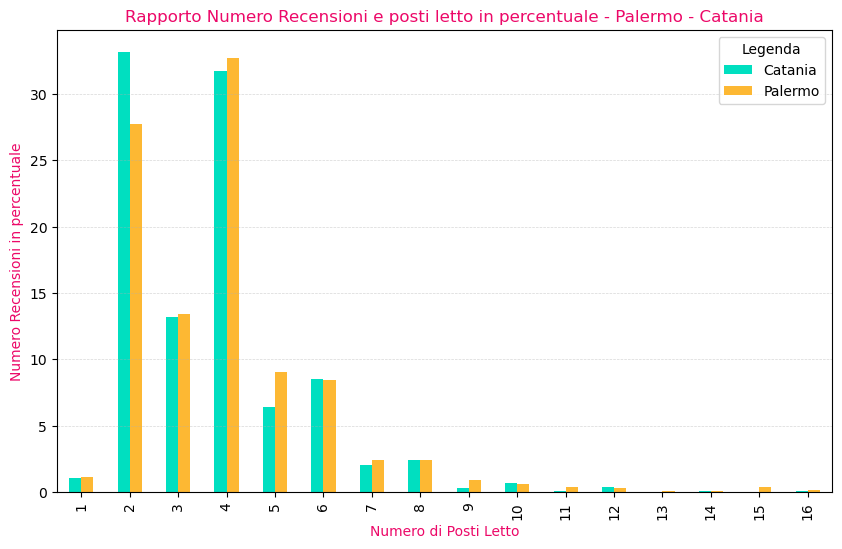

In [39]:
catania_x_palermo = pd.DataFrame({
    'accomodates': accomodates,
    'reviews_per_cent_catania': reviews_per_cent_catania,
    'reviews_per_cent_palermo': reviews_per_cent
})

catania_x_palermo.plot(x='accomodates', y=['reviews_per_cent_catania', 'reviews_per_cent_palermo'], kind='bar', color=['#00DFC0','#fdb833'], figsize=(10, 6))

plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.5)
plt.title('Rapporto Numero Recensioni e posti letto in percentuale - Palermo - Catania', color='#ec0868')
plt.xlabel('Numero di Posti Letto', color='#ec0868')
plt.ylabel('Numero Recensioni in percentuale', color='#ec0868')

_ = plt.legend(['Catania','Palermo'], title="Legenda", loc="upper right", fontsize=10)


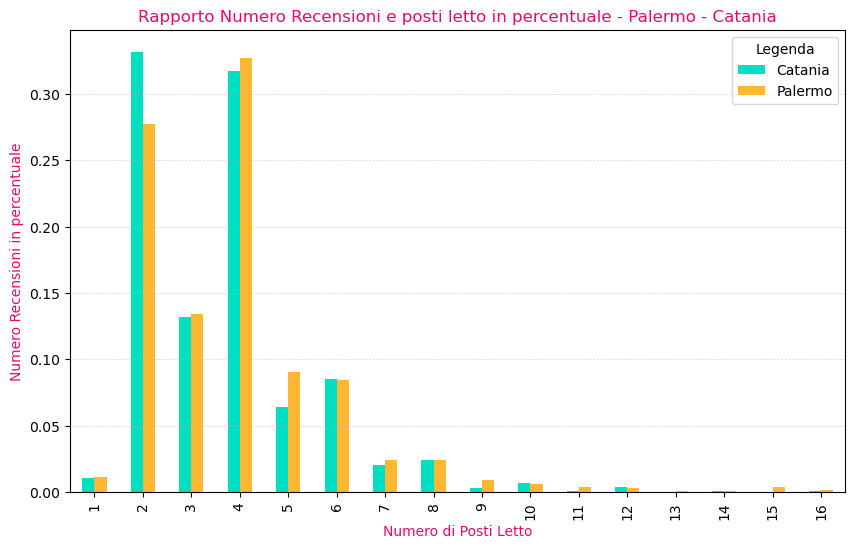

In [40]:
catania_x_palermo_fractioned = pd.DataFrame({
    'accomodates': accomodates,
    'reviews_fractioned_catania': reviews_fractioned_catania,
    'reviews_fractioned': reviews_fractioned
})

catania_x_palermo_fractioned .plot(x='accomodates', y=['reviews_fractioned_catania', 'reviews_fractioned'], kind='bar', color=['#00DFC0','#fdb833'], figsize=(10, 6))

plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.5)
plt.title('Rapporto Numero Recensioni e posti letto in percentuale - Palermo - Catania', color='#ec0868')
plt.xlabel('Numero di Posti Letto', color='#ec0868')
plt.ylabel('Numero Recensioni in percentuale', color='#ec0868')

_ = plt.legend(['Catania','Palermo'], title="Legenda", loc="upper right", fontsize=10)

In [41]:
accomodates_number = palermo_bnb.groupby('accommodates').size()
accomodates_number

accommodates
1      116
2     2088
3      936
4     2358
5      584
6      679
7      153
8      186
9       41
10      72
11      19
12      17
13       4
14       9
15       7
16      27
dtype: int64

In [42]:
n_accommodates = [116,2088,936,2358,584,679,153,186,41,72,19,17,4,9,7,27]
n_accommodates

[116, 2088, 936, 2358, 584, 679, 153, 186, 41, 72, 19, 17, 4, 9, 7, 27]

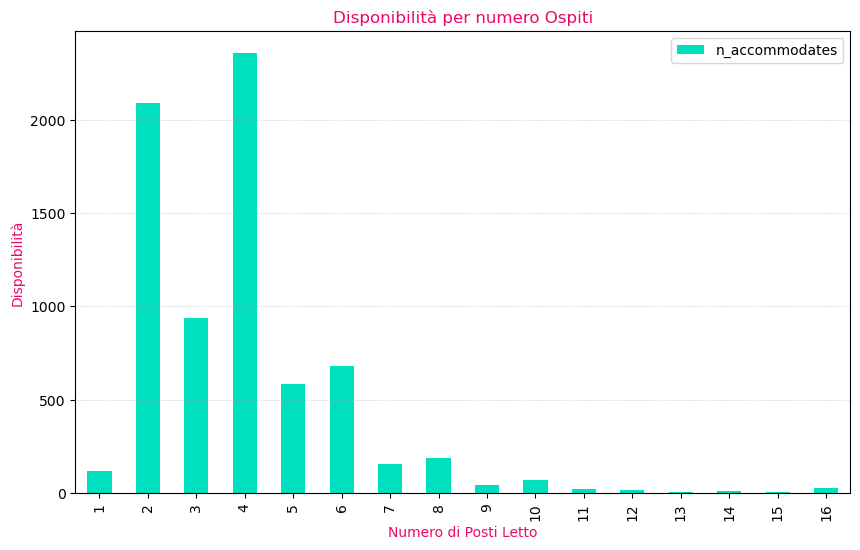

In [43]:
n_accommodates_x_accommodates = pd.DataFrame({
    'accommodates' : [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],
    'n_accommodates': n_accommodates
})

n_accommodates_x_accommodates.plot(x='accommodates', y='n_accommodates', kind='bar', color='#00DFC0', figsize=(10, 6))

plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.5)
plt.title('Disponibilità per numero Ospiti', color='#ec0868')
plt.xlabel('Numero di Posti Letto', color='#ec0868')
_ = plt.ylabel('Disponibilità', color='#ec0868')


In [44]:
# percentili Palermo, disponibilità case x posti letto

n_accommodates = [116,2088,936,2358,584,679,153,186,41,72,19,17,4,9,7,27]

accommodates = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
n_accommodates
somma_acc = 0
temp = 0
n_accommodates_fractioned = []

for i in range(len(n_accommodates)):
    somma_acc = somma_acc + n_accommodates[i]
    # print(somma_rec)

print(f"la somma dei locali è {somma_rec}")

for i in range(len(n_accommodates)):
    temp = n_accommodates[i] / somma_acc
    # print(temp)
    n_accommodates_fractioned.append(temp)

print(f"I percentili sono: {n_accommodates_fractioned}")

temp = 0
n_accommodates_per_cent = []

for i in range(len(n_accommodates_fractioned)):
    temp = n_accommodates_fractioned[i] * 100 
    n_accommodates_per_cent.append(temp)


print(f"l'array di percentuali è: \n{n_accommodates_per_cent}")


la somma dei locali è 138609
I percentili sono: [0.015899122807017545, 0.28618421052631576, 0.12828947368421054, 0.32319078947368424, 0.0800438596491228, 0.09306469298245613, 0.020970394736842105, 0.02549342105263158, 0.005619517543859649, 0.009868421052631578, 0.0026041666666666665, 0.0023300438596491227, 0.0005482456140350877, 0.0012335526315789473, 0.0009594298245614035, 0.003700657894736842]
l'array di percentuali è: 
[1.5899122807017545, 28.618421052631575, 12.828947368421053, 32.319078947368425, 8.00438596491228, 9.306469298245613, 2.0970394736842106, 2.549342105263158, 0.5619517543859649, 0.9868421052631579, 0.26041666666666663, 0.23300438596491227, 0.05482456140350877, 0.12335526315789473, 0.09594298245614034, 0.3700657894736842]


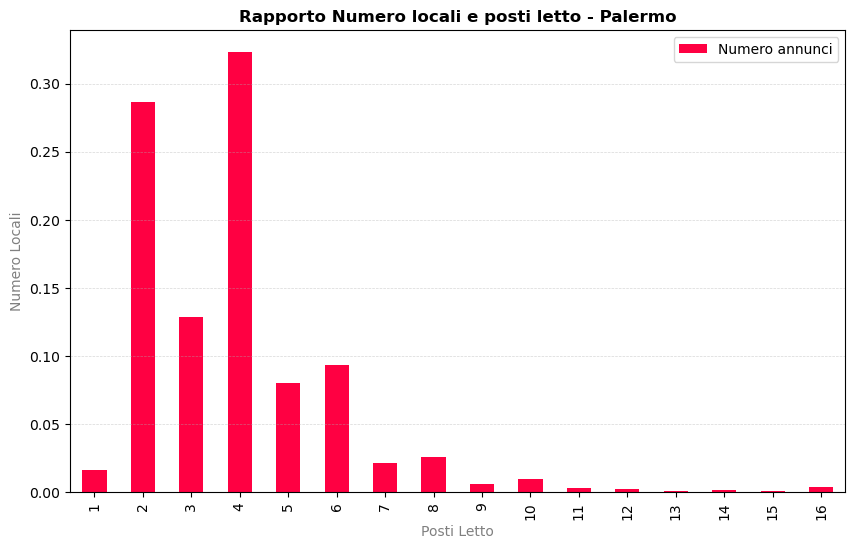

In [95]:
accomodates = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
standard_number_x_accomodation = pd.DataFrame({
    'accomodates': accomodates,
    'n_accommodates_fractioned': n_accommodates_fractioned
})

standard_number_x_accomodation.plot(x='accomodates', y='n_accommodates_fractioned', kind='bar', color='#ff0042', figsize=(10, 6))
plt.grid(axis='y',linestyle='--', linewidth=0.5, alpha=0.5)
plt.title('Rapporto Numero locali e posti letto - Palermo',color='black', fontweight='bold')
plt.xlabel('Posti Letto',color='gray')
plt.legend(['Numero annunci'],  loc="upper right", fontsize=10)
_ = plt.ylabel('Numero Locali',color='gray')

plt.savefig('numero_locali_posti_letto.png', bbox_inches='tight', dpi=300)

[1.5899122807017545,
 28.618421052631575,
 12.828947368421053,
 32.319078947368425,
 8.00438596491228,
 9.306469298245613,
 2.0970394736842106,
 2.549342105263158,
 0.5619517543859649,
 0.9868421052631579,
 0.26041666666666663,
 0.23300438596491227,
 0.05482456140350877,
 0.12335526315789473,
 0.09594298245614034,
 0.3700657894736842]

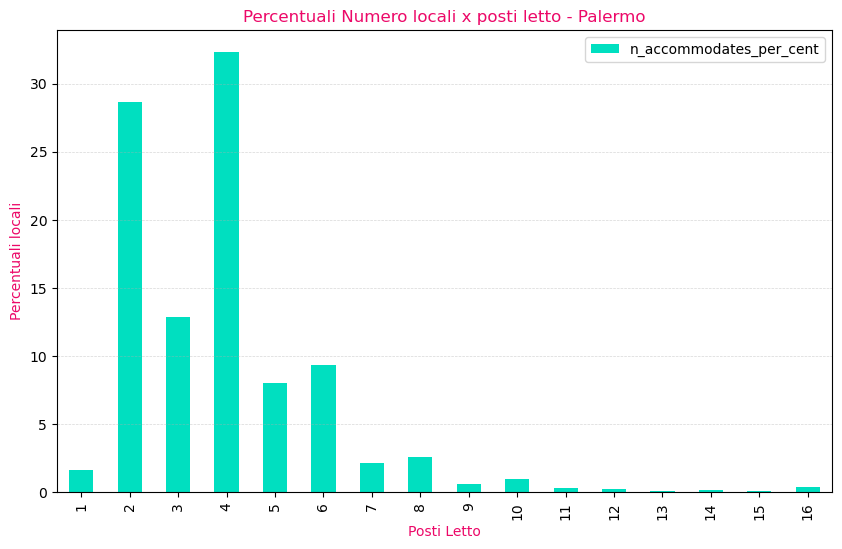

In [46]:
accomodates = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
standard_number_x_accomodation_percent = pd.DataFrame({
    'accomodates': accomodates,
    'n_accommodates_per_cent': n_accommodates_per_cent
})

standard_number_x_accomodation_percent.plot(x='accomodates', y='n_accommodates_per_cent', kind='bar', color='#00DFC0', figsize=(10, 6))
plt.grid(axis='y',linestyle='--', linewidth=0.5, alpha=0.5)
plt.title('Percentuali Numero locali x posti letto - Palermo',color='#ec0868')
plt.xlabel('Posti Letto',color='#ec0868')
_ = plt.ylabel('Percentuali locali',color='#ec0868')

n_accommodates_per_cent